In [26]:
import pandas as pd
from skimage import measure,draw
import numpy as np
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

In [39]:
'''读取文件'''

# coding=gbk
from PIL import Image
import numpy as np
# import scipy

def loadImage():
    # 读取图片
    im = Image.open("C:/Users/Forry/Desktop/2001年a/99.bmp")

    # 显示图片
    #im.show() 
    
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data)
#     print data 
    # 变换成512*512
    data = np.reshape(data,(512,512))
    print(data)
    s = pd.DataFrame(data)
    #print(s)
    #new_im = Image.fromarray(data)
    # 显示图片
    #new_im.show()
    #s.to_excel('C:/Users/Forry/Desktop/1.xlsx')
    return data
    
data = loadImage()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
rows,cols=img.shape

In [22]:
edge = cv2.Canny(img, 100, 200)

ans = []
for y in range(0, edge.shape[0]):
    for x in range(0, edge.shape[1]):
        if edge[y, x] != 0:
            ans = ans + [[x, y]]
ans = np.array(ans)

print(ans.shape)

[array([[474.        , 264.00196078],
       [473.00196078, 265.        ],
       [473.00196078, 266.        ],
       ...,
       [474.00196078, 263.        ],
       [474.00196078, 264.        ],
       [474.        , 264.00196078]])]


In [40]:
import numpy as np
from PIL import Image

def imconv(image_array,suanzi):
    '''计算卷积
        参数
        image_array 原灰度图像矩阵
        suanzi      算子
        返回
        原图像与算子卷积后的结果矩阵
    '''
    image = image_array.copy()     # 原图像矩阵的深拷贝
    
    dim1,dim2 = image.shape

    # 对每个元素与算子进行乘积再求和(忽略最外圈边框像素)
    for i in range(1,dim1-1):
        for j in range(1,dim2-1):
            image[i,j] = (image_array[(i-1):(i+2),(j-1):(j+2)]*suanzi).sum()
    
    # 由于卷积后灰度值不一定在0-255之间，统一化成0-255
    image = image*(255.0/image.max())

    # 返回结果矩阵
    return image

image = imconv(data,0.5)
print(image)

[[ 56.69136879  56.69136879  56.69136879 ...  56.69136879  56.69136879
   56.69136879]
 [ 56.69136879 255.         255.         ... 255.         255.
   56.69136879]
 [ 56.69136879 255.         255.         ... 255.         255.
   56.69136879]
 ...
 [ 56.69136879 255.         255.         ... 255.         255.
   56.69136879]
 [ 56.69136879 255.         255.         ... 255.         255.
   56.69136879]
 [ 56.69136879  56.69136879  56.69136879 ...  56.69136879  56.69136879
   56.69136879]]


In [32]:
s = pd.DataFrame(image)
s.to_excel('C:/Users/Forry/Desktop/3.xlsx')

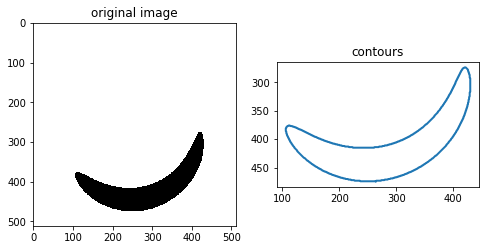

In [43]:
contours = measure.find_contours(data, 0.5)

#绘制轮廓
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(data,plt.cm.gray)
ax0.set_title('original image')

rows,cols=data.shape

ax1.axis([0,rows,cols,0])
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('image')
ax1.set_title('contours')
plt.show()

In [47]:
print(ax1)
    

AxesSubplot(0.547727,0.393773;0.352273x0.217454)
